# HW 1: Linear Algebra and Floating Point Arithmetic

### Direct Methods for the solution of Linear Systems
1. Given a matrix $A \in \mathbb{R}^{n \times n}$, the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$, and a value for $n$, write a script that:
    - Computes the right-hand side of the linear system $y = A x_{true}$ (test problem).
    - Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
    - Solves the linear system $Ax = y$ with the function `np.linalg.solve()`.
    - Computes the relative error between the computed solution and the true solution $x_{true}$.
    - Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a different window) the condition number in 2-norm and in $\infty$-norm, as a function of $n$.

2. Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:
    - A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
    - The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
    - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import hilbert

#### Part 1

In [3]:
def compute_matrix(A):
    # Compute the right-hand side of the linear system b = A * x[true]
    n = A.shape[0]
    x_true = np.ones((n, 1))
    b = A @ x_true # b = np.dot(A, x_true) equivalent to the above

    # Compute the condition number in 2-norm
    cond_2_norm = np.linalg.cond(A, 2)

    # Compute the condition number in infinity norm
    cond_inf_norm = np.linalg.cond(A, np.inf)
    
    # Solve the linear system Ax = b
    x_computed = np.linalg.solve(A, b)

    # Compute the relative error
    relative_error = np.linalg.norm(x_computed - x_true, 2) / np.linalg.norm(x_true)

    return relative_error, cond_2_norm, cond_inf_norm

In [4]:
# Check if the matrix is ill-conditioned
def chek_conditioned_matrix(cond_number, data_type):
    if cond_number > (1 / np.finfo(data_type).eps):
        print("The matrix is ill-conditioned.")
    else:
        print("The matrix is well-conditioned.")

In [5]:
# Test and discuss a random matrix
n = 100
A = np.random.randn(n, n)
relative_error, cond_2_norm, cond_inf_norm = compute_matrix(A)

print(f"Condition number in 2-norm: {cond_2_norm}")
chek_conditioned_matrix(cond_2_norm, A.dtype)

print(f"Condition number in infinity norm: {cond_inf_norm}")
chek_conditioned_matrix(cond_inf_norm, A.dtype)

print(f"Relative error: {relative_error}")

Condition number in 2-norm: 1301.6962608662136
The matrix is well-conditioned.
Condition number in infinity norm: 13770.927955970941
The matrix is well-conditioned.
Relative error: 3.676761647495623e-14


The matrix can be considered moderately well-conditioned, although the conditioning value is not close to 1, compared to the inverse of machine precision (which is decidedly low) the conditioning values can be considered low.

#### Part 2

In [6]:
def test_matrices(matrices, name):

    errors = []
    cond_2_norms = []
    cond_inf_norms = []

    for A in matrices:
        error, cond_2_norm, cond_inf_norm = compute_matrix(A)
        errors.append(error)
        cond_2_norms.append(cond_2_norm)
        cond_inf_norms.append(cond_inf_norm)

    # Plot the solution
    plt.figure(figsize=(20, 10))
    plt.plot(range(1, len(matrices)+1), errors, label='Relative Error')
    plt.xlabel('Matrix dimension')
    plt.ylabel('Relative Error')
    plt.title(f'Relative Error for {name} matrices')
    plt.legend()
    plt.show()

    # Plot the condition numbers
    plt.figure(figsize=(20, 10))
    plt.plot(range(1, len(matrices)+1), cond_2_norms, label='2-norm')
    plt.plot(range(1, len(matrices)+1), cond_inf_norms, label='Infinity norm')
    plt.xlabel('Matrix dimension')
    plt.ylabel('Condition Number')
    plt.title(f'Condition Numbers for {name} matrices')
    plt.legend()
    plt.show()

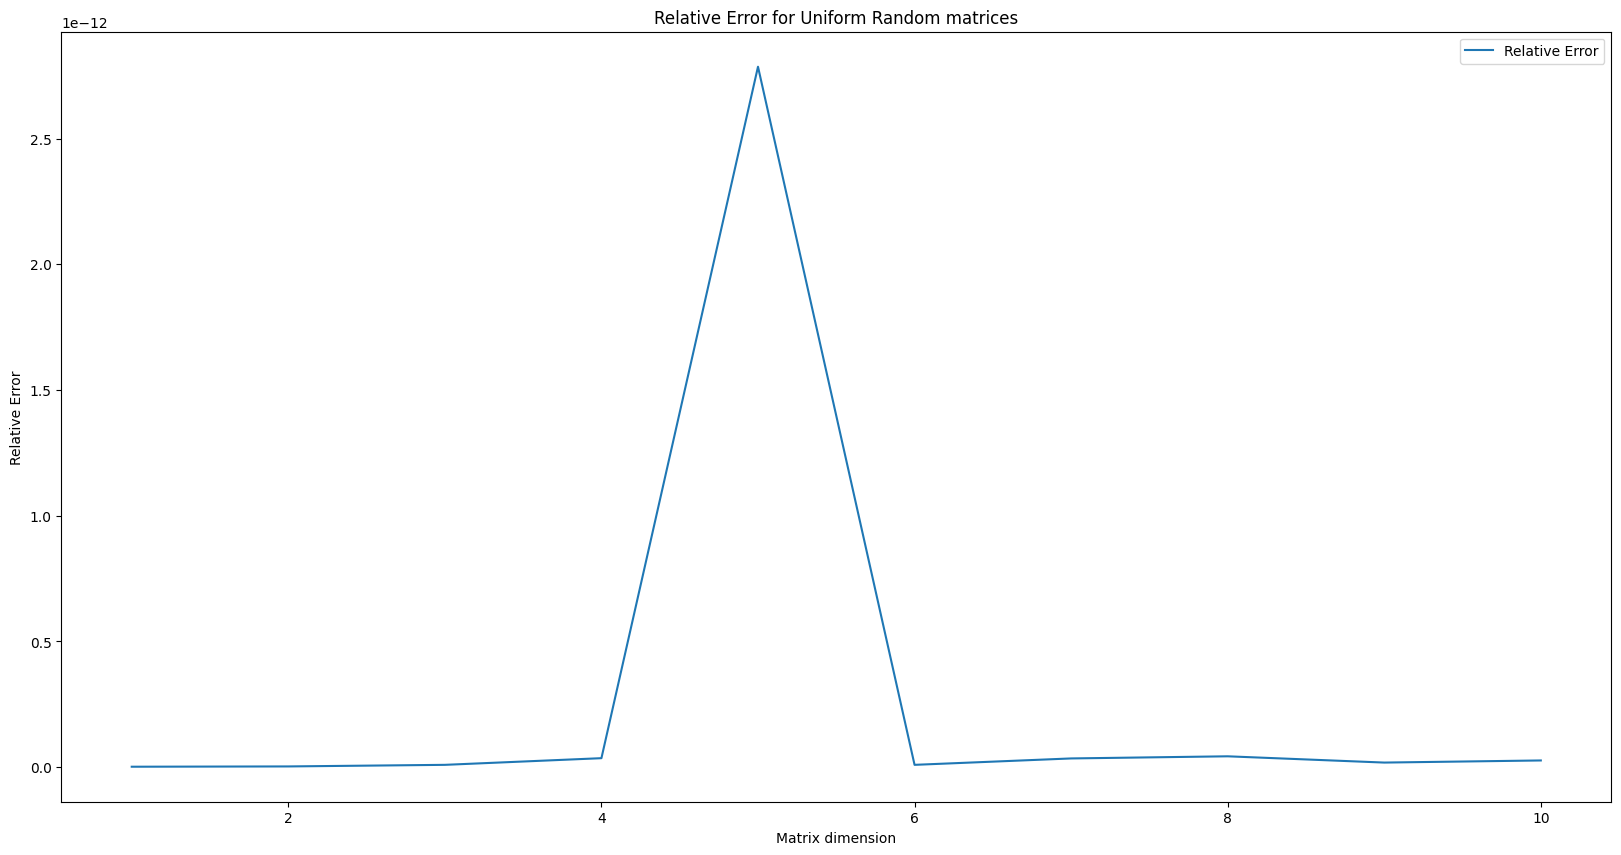

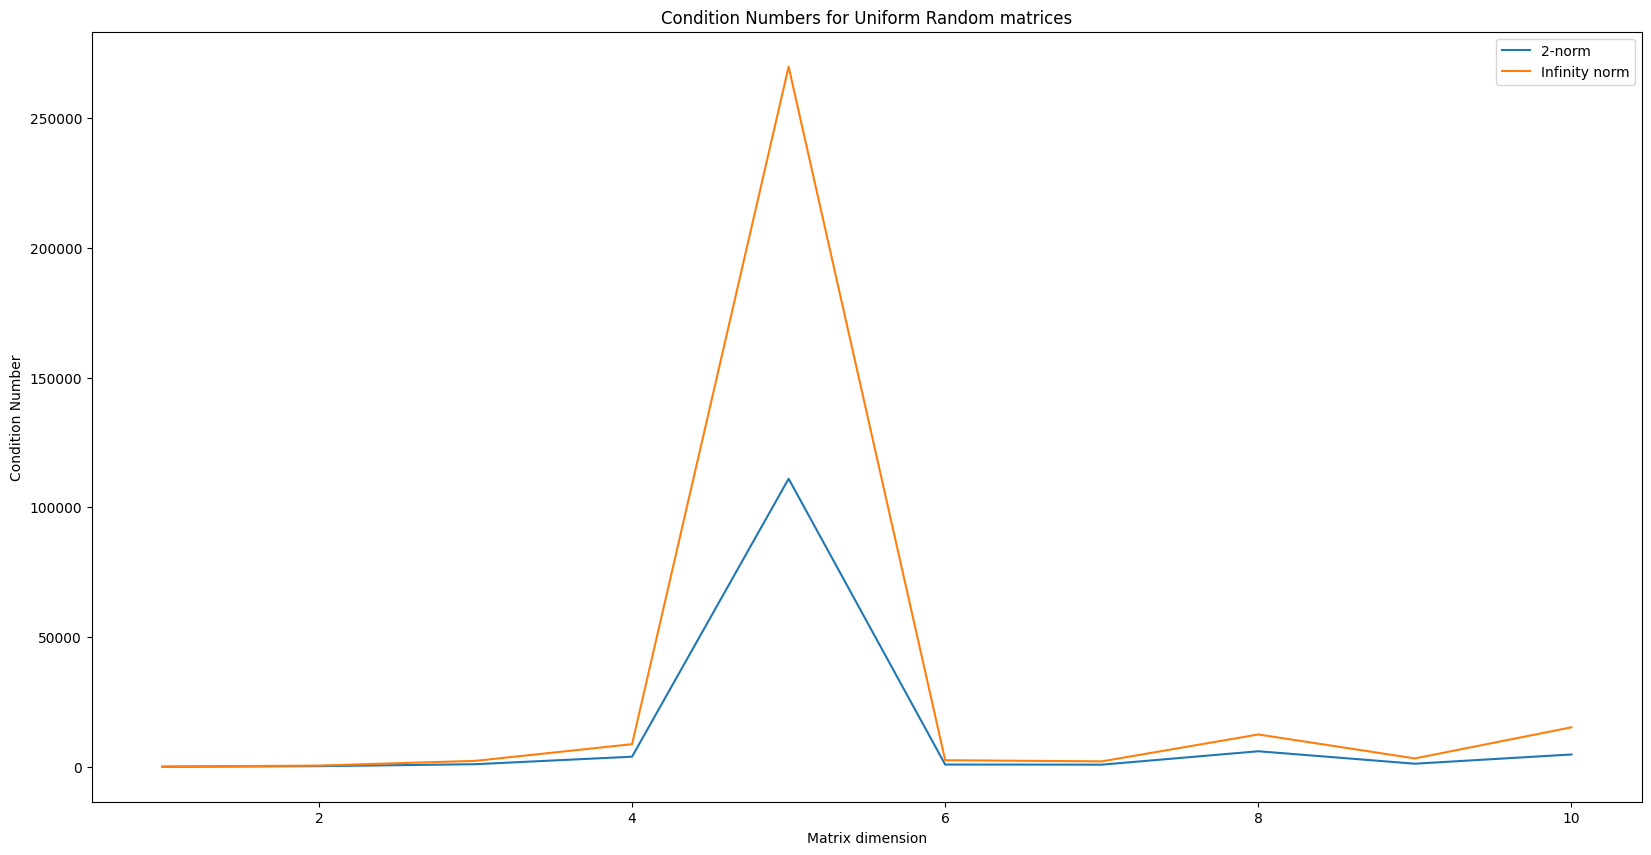

In [7]:
# Test Random Uniform matrices
matrices = [np.random.rand(n, n) for n in range(10, 101, 10)]
test_matrices(matrices, "Uniform Random")

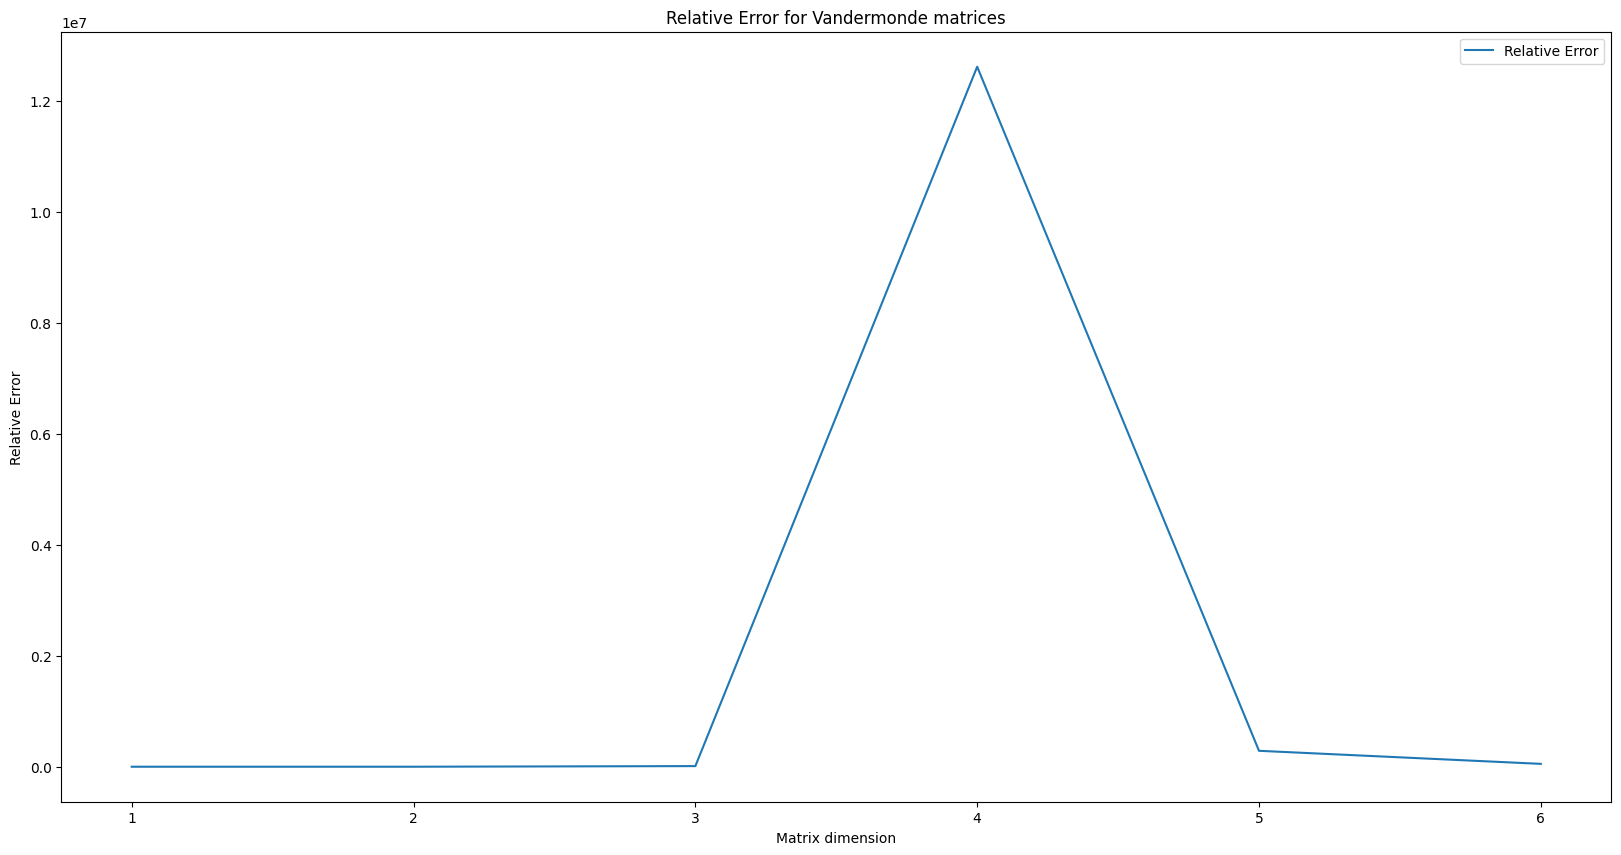

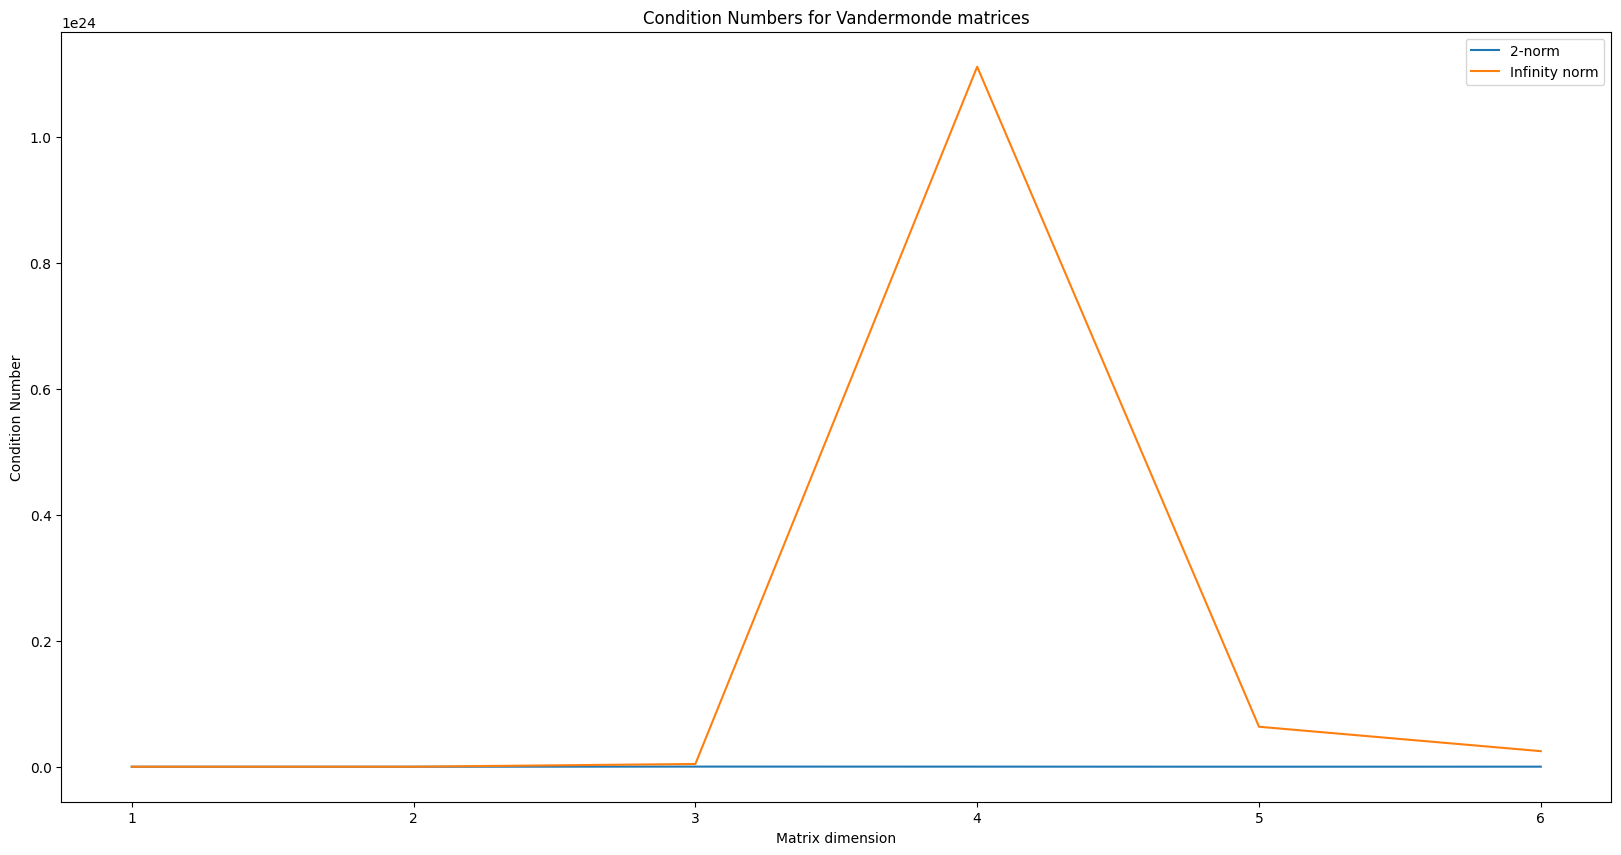

In [8]:
# Test Vandermonde matrices
matrices = [np.vander(np.arange(1, n+1), increasing=True) for n in range(5, 31, 5)]
test_matrices(matrices, "Vandermonde")

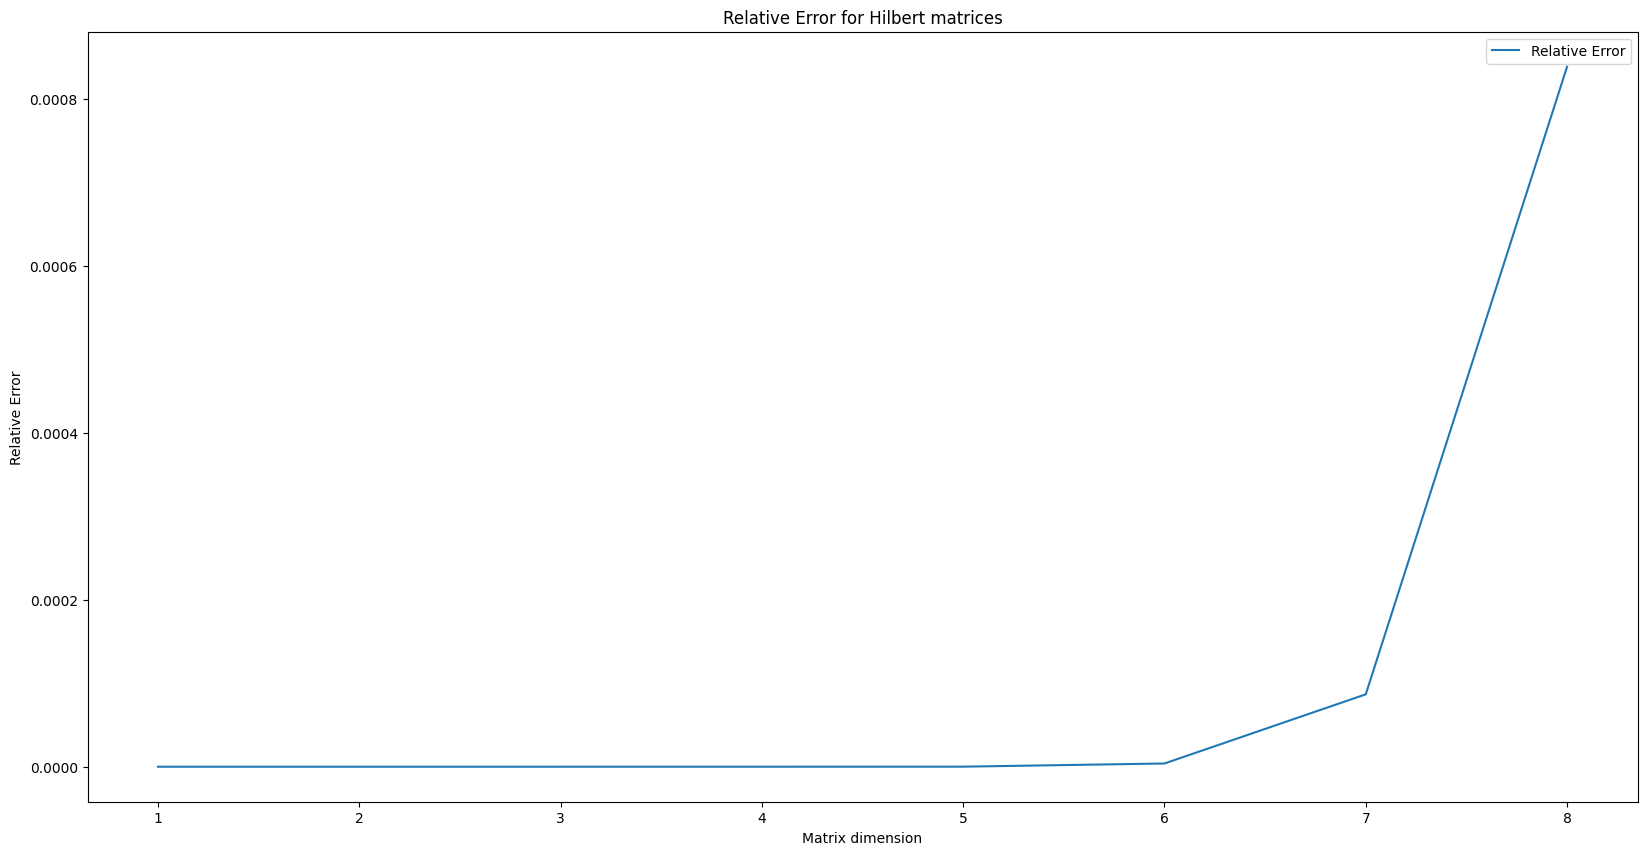

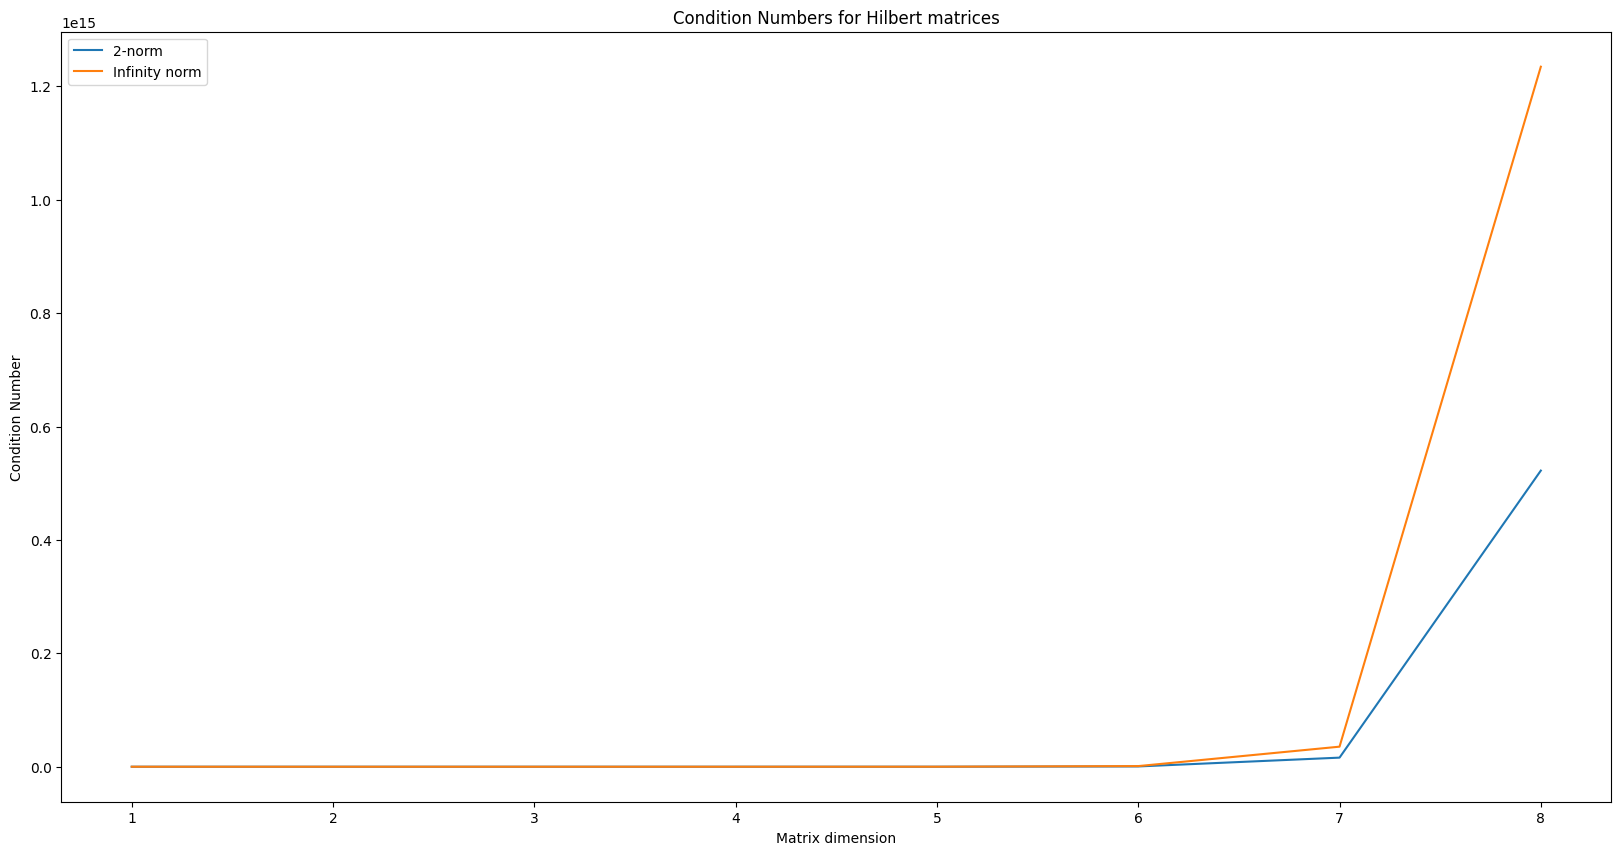

In [9]:
# Test Hilbert matrices
matrices = [hilbert(n) for n in range(4, 12)]
test_matrices(matrices, "Hilbert")

### Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. *Tips:* use a `while` structure.

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n \to \infty} a_n = e$, where $e$ is the Nepero number. Choose diﬀerent values for $n$, compute $a_n$ and compare it to the real value of the Nepero number. What happens if you choose a large value of $n$?

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples. *Tips:* Please, have a look at `np.linalg`.

In [10]:
# Compute machine epsilon
epsilon = 1.0
while (1.0 + epsilon) != 1.0:
    epsilon /= 2.0
epsilon *= 2.0
print(f"Machine epsilon: {epsilon}")
print(f"Machine epsilon from numpy: {np.finfo(float).eps}")

Machine epsilon: 2.220446049250313e-16
Machine epsilon from numpy: 2.220446049250313e-16


In [30]:
# Evaluate the sequence a_n = (1 + 1/n)^n
n_values = [10, 100, 1000, 10000, 100000]
a_n_values = [(1 + 1/n)**n for n in n_values]
e = math.e

# Print the values
print("n\t\t\t(1 + 1/n)^n\t\t\t\tNepero number (e)\t\t\tError")
for n, a_n in zip(n_values, a_n_values):
    print(f"{n}\t\t\t{a_n}\t\t\t{e}\t\t\t{abs(a_n - e)}")

n			(1 + 1/n)^n				Nepero number (e)			Error
10			2.5937424601000023			2.718281828459045			0.12453936835904278
100			2.7048138294215285			2.718281828459045			0.01346799903751661
1000			2.7169239322355936			2.718281828459045			0.0013578962234515046
10000			2.7181459268249255			2.718281828459045			0.000135901634119584
100000			2.7182682371922975			2.718281828459045			1.359126674760347e-05


Minimum distance: 0.0054167054075904275


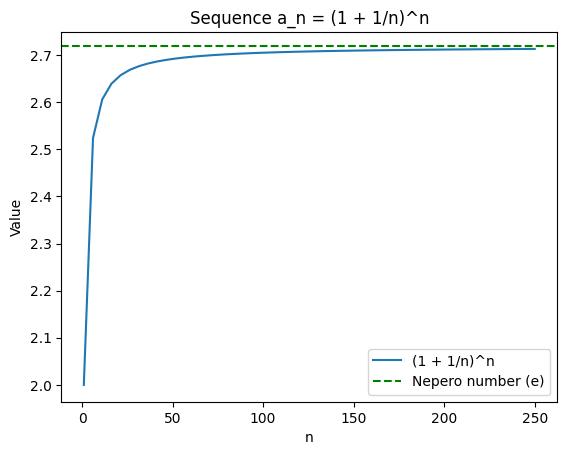

In [77]:
def plot_sequence(domain=np.linspace(1, 250)):
    e = math.e
    continuous_values = (1 + 1/domain)**domain
    min_distance = np.argmin(np.abs(continuous_values - e))
    print(f"Minimum distance: {abs(continuous_values[min_distance] - e)}")
    # Plot the sequence a_n = (1 + 1/n)^n
    plt.plot(domain, continuous_values, label='(1 + 1/n)^n')
    plt.axhline(e, color='g', linestyle='--', label='Nepero number (e)')
    plt.xlabel('n')
    plt.ylabel('Value')
    plt.title('Sequence a_n = (1 + 1/n)^n')
    plt.legend()
    plt.show()

plot_sequence()

We can also try to understand if is there a certain value of $n$ for which the succestion cannot be imporoved anymore since the machine epsilon is reached.

We try to guess the value of $n$ for which the machine epsilon is reached and analyze the behavior of the sequence $a_n$ for $n$ greater than this value.

Minimum distance: 3.7343106384923885e-10


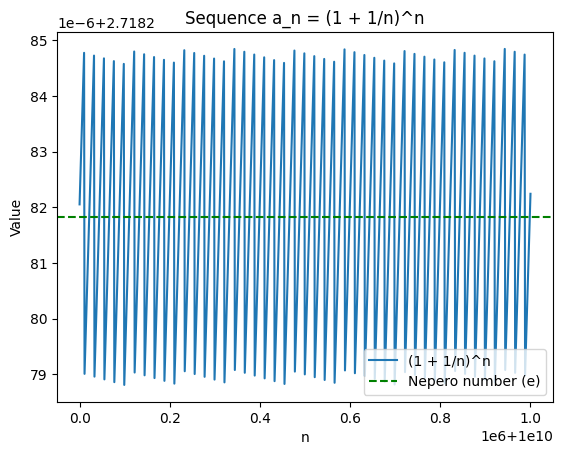

In [86]:
N = 1e10
treshold = 1000000
plot_sequence(np.linspace(N, N+treshold, 1000))   

In [87]:
# Analyze matrices A and B
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print(f"Rank of A: {np.linalg.matrix_rank(A)}")
print(f"Eigenvalues of A: {np.linalg.eigvals(A)}\n")

print(f"Rank of B: {np.linalg.matrix_rank(B)}")
print(f"Eigenvalues of B: {np.linalg.eigvals(B)}\n")


# Additional examples to corroborate the deduction
C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
D = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

print(f"Rank of C: {np.linalg.matrix_rank(C)}")
print(f"Eigenvalues of C: {np.linalg.eigvals(C)}\n")

print(f"Rank of D: {np.linalg.matrix_rank(D)}")
print(f"Eigenvalues of D: {np.linalg.eigvals(D)}\n")

Rank of A: 2
Eigenvalues of A: [5. 2.]

Rank of B: 1
Eigenvalues of B: [5. 0.]

Rank of C: 2
Eigenvalues of C: [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]

Rank of D: 3
Eigenvalues of D: [1. 1. 1.]



The eigenvalue of A, C is 0 (for C is almost 0) so  A and C are not a full rank matrix.  

Since we know that the determinant of a matrix is the product of its eigenvalues, and we know that the determinant of a non-full rank matrix is 0 (because by definition the rank of a matrix is the dimension of the bigger non-singular matrix) we can deduce that the determinant of a matrix is zero if and only if at least one of its eigenvalues is zero. Thus, if a matrix is not full rank then it has at least one zero-valued eigenvalue.